# Proyecto Final
# Prediccion de producto semanales
Deep learning
* Javier Prado - 21486
* Bryan España - 21550

In [35]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [36]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [37]:
df = pd.read_csv('demand_weekly_chocolates_2018-2024.csv')
df['week_start'] = pd.to_datetime(df['week_start'])
df.head()

,week_start,demand,promo_flag,promo_lift,promo_carryover,holiday_flag,holiday_lead_flag,holiday_decay_flag,year,month,week_of_year
0,2018-01-01,34,0,0.0,0.0,0,0,0,2018,1,1
1,2018-01-08,45,0,0.0,0.0,0,0,0,2018,1,2
2,2018-01-15,35,0,0.0,0.0,0,0,0,2018,1,3
3,2018-01-22,29,0,0.0,0.0,0,0,0,2018,1,4
4,2018-01-29,49,0,0.0,0.0,0,0,0,2018,1,5


In [38]:
df.tail()

,week_start,demand,promo_flag,promo_lift,promo_carryover,holiday_flag,holiday_lead_flag,holiday_decay_flag,year,month,week_of_year
361,2024-12-02,34,0,0.0,0.0,0,0,1,2024,12,49
362,2024-12-09,41,0,0.0,0.0,0,0,0,2024,12,50
363,2024-12-16,89,0,0.0,0.0,0,1,0,2024,12,51
364,2024-12-23,62,0,0.0,0.0,1,1,0,2024,12,52
365,2024-12-30,83,0,0.0,0.0,1,0,1,2024,12,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   week_start          366 non-null    datetime64[ns]
 1   demand              366 non-null    int64         
 2   promo_flag          366 non-null    int64         
 3   promo_lift          366 non-null    float64       
 4   promo_carryover     366 non-null    float64       
 5   holiday_flag        366 non-null    int64         
 6   holiday_lead_flag   366 non-null    int64         
 7   holiday_decay_flag  366 non-null    int64         
 8   year                366 non-null    int64         
 9   month               366 non-null    int64         
 10  week_of_year        366 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(8)
memory usage: 31.6 KB


In [40]:
df.columns

Index(['week_start', 'demand', 'promo_flag', 'promo_lift', 'promo_carryover',
       'holiday_flag', 'holiday_lead_flag', 'holiday_decay_flag', 'year',
       'month', 'week_of_year'],
      dtype='object')

El dataset nos brinda datos de un producto desde las fechas 1 de enero del 2018 hasta la última semana del mes de diciembre del año 2014.
Las columnas del dataset son las siguientes:
- week_start: Marca el índice temporal semanal (lunes–domingo).
- demand: unidades vendidas esa semana
- promo_flag: indicador 0/1 de si hubo promoción esa semana.
- promo_lift: proporción (p. ej., 0.25 = +25%) que el simulador aplicó por la promo en esa semana.
- promo_carryover: proporción de “arrastre” de la promo hacia la semana siguiente
- holiday_flag: indicador 0/1 de que la semana incluye un feriado/evento principa
- holiday_lead_flag: indicador 0/1 de semana previa al feriado
- holiday_Decay_flag: indicador 0/1 de semana posterior al feriado
- year: año del week_start
- month: mes del week_start
- week_of_year: semana del año (1-53)
Sumando 366 entradas en total: 1 entrada --> 1 semana 

In [41]:
def print_statistical_summary(df):
    """Imprime un resumen estadístico detallado de la demanda"""

    
    print("="*60)
    print("RESUMEN ESTADISTICO DE LA VARIABLE TARGET 'DEMAND'")
    print("="*60)
    
    print(f"\nESTADISTICAS DESCRIPTIVAS:")
    print(f"   • Número de observaciones: {len(df)}")
    print(f"   • Media: {df['demand'].mean():.2f}")
    print(f"   • Mediana: {df['demand'].median():.2f}")
    print(f"   • Desviación estándar: {df['demand'].std():.2f}")
    print(f"   • Varianza: {df['demand'].var():.2f}")
    print(f"   • Minimo: {df['demand'].min()}")
    print(f"   • Maximo: {df['demand'].max()}")
    print(f"   • Rango: {df['demand'].max() - df['demand'].min()}")
    
    print(f"\nPERCENTILES:")
    percentiles = [10, 25, 50, 75, 90, 95, 99]
    for p in percentiles:
        value = np.percentile(df['demand'], p)
        print(f"   • P{p}: {value:.2f}")
    
    print(f"\nANALISIS DE FORMA:")
    skewness = df['demand'].skew()
    kurtosis = df['demand'].kurtosis()
    print(f"   • Asimetría (Skewness): {skewness:.3f}")
    if skewness > 0:
        print("     → Distribucion sesgada hacia la derecha")
    elif skewness < 0:
        print("     → Distribucion sesgada hacia la izquierda")
    else:
        print("     → Distribucion simetrica")
    
    print(f"   • Curtosis: {kurtosis:.3f}")
    if kurtosis > 0:
        print("     → Distribucion leptocúrtica (más puntiaguda)")
    elif kurtosis < 0:
        print("     → Distribucio platocúrtica (más plana)")
    else:
        print("     → Distribucion mesocúrtica (normal)")
    
    print(f"\n🔍 ANÁLISIS DE OUTLIERS:")
    Q1 = df['demand'].quantile(0.25)
    Q3 = df['demand'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df['demand'] < lower_bound) | (df['demand'] > upper_bound)]
    
    print(f"   • Límite inferior: {lower_bound:.2f}")
    print(f"   • Límite superior: {upper_bound:.2f}")
    print(f"   • Número de outliers: {len(outliers)}")
    print(f"   • Porcentaje de outliers: {len(outliers)/len(df)*100:.2f}%")
    
    if len(outliers) > 0:
        print(f"   • Valores atípicos: {sorted(outliers['demand'].tolist())}")
    
    
    # Análisis por factores
    print(f"\nANÁLISIS POR PROMOCIONES:")
    promo_stats = df.groupby('promo_flag')['demand'].agg(['mean', 'std', 'count'])
    print(f"   • Sin promoción - Media: {promo_stats.loc[0, 'mean']:.2f}, Std: {promo_stats.loc[0, 'std']:.2f}, N: {promo_stats.loc[0, 'count']}")
    if 1 in promo_stats.index:
        print(f"   • Con promoción - Media: {promo_stats.loc[1, 'mean']:.2f}, Std: {promo_stats.loc[1, 'std']:.2f}, N: {promo_stats.loc[1, 'count']}")
    
    print(f"\nANÁLISIS POR DÍAS FESTIVOS:")
    holiday_stats = df.groupby('holiday_flag')['demand'].agg(['mean', 'std', 'count'])
    print(f"   • Días normales - Media: {holiday_stats.loc[0, 'mean']:.2f}, Std: {holiday_stats.loc[0, 'std']:.2f}, N: {holiday_stats.loc[0, 'count']}")
    if 1 in holiday_stats.index:
        print(f"   • Días festivos - Media: {holiday_stats.loc[1, 'mean']:.2f}, Std: {holiday_stats.loc[1, 'std']:.2f}, N: {holiday_stats.loc[1, 'count']}")

print_statistical_summary(df)

RESUMEN ESTADISTICO DE LA VARIABLE TARGET 'DEMAND'

ESTADISTICAS DESCRIPTIVAS:
   • Número de observaciones: 366
   • Media: 55.86
   • Mediana: 52.50
   • Desviación estándar: 21.37
   • Varianza: 456.79
   • Minimo: 17
   • Maximo: 148
   • Rango: 131

PERCENTILES:
   • P10: 33.00
   • P25: 41.00
   • P50: 52.50
   • P75: 67.00
   • P90: 84.00
   • P95: 94.75
   • P99: 118.85

ANALISIS DE FORMA:
   • Asimetría (Skewness): 0.994
     → Distribucion sesgada hacia la derecha
   • Curtosis: 1.548
     → Distribucion leptocúrtica (más puntiaguda)

🔍 ANÁLISIS DE OUTLIERS:
   • Límite inferior: 2.00
   • Límite superior: 106.00
   • Número de outliers: 10
   • Porcentaje de outliers: 2.73%
   • Valores atípicos: [107, 108, 111, 112, 112, 115, 126, 129, 141, 148]

ANÁLISIS POR PROMOCIONES:
   • Sin promoción - Media: 53.30, Std: 19.56, N: 303
   • Con promoción - Media: 68.19, Std: 25.28, N: 63

ANÁLISIS POR DÍAS FESTIVOS:
   • Días normales - Media: 52.67, Std: 18.64, N: 332
   • Días festi

# Análisis Exploratorio de Datos (EDA) - Variable Target "demand"

Vamos a realizar un análisis completo de la variable objetivo para entender:
- Distribución y características estadísticas
- Patrones temporales y estacionalidad
- Relación con variables promocionales y festivos
- Identificación de outliers y tendencias

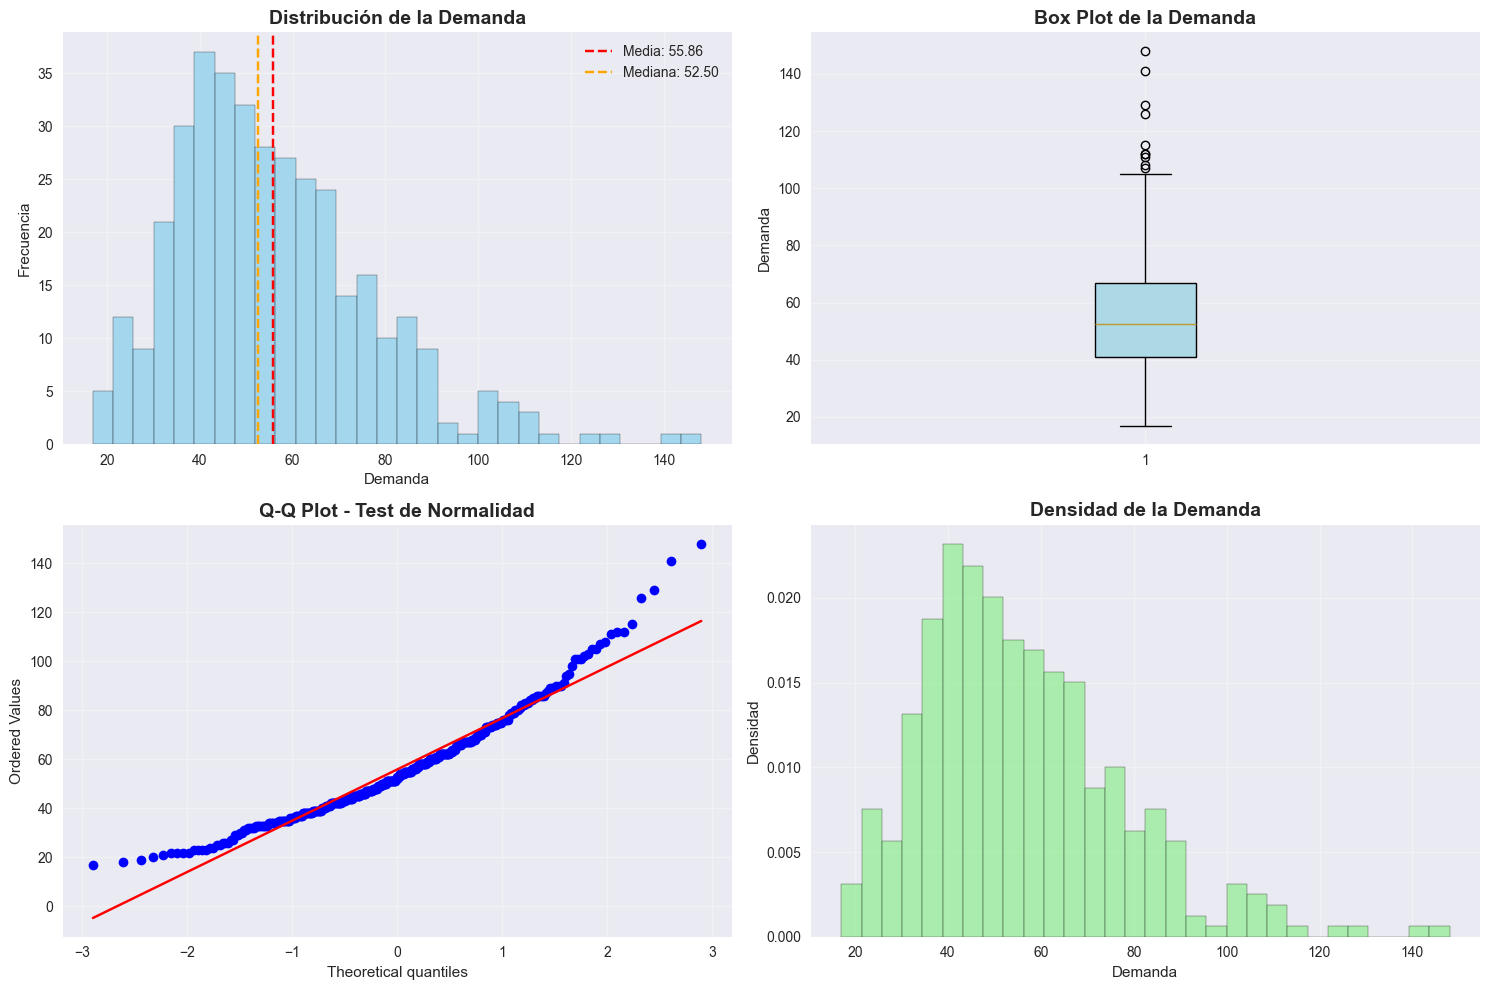

In [43]:
# 1. ANÁLISIS DE DISTRIBUCIÓN
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograma
axes[0,0].hist(df['demand'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
mean_demand = df['demand'].mean()
median_demand = df['demand'].median()
axes[0,0].axvline(mean_demand, color='red', linestyle='--', label=f'Media: {mean_demand:.2f}')
axes[0,0].axvline(median_demand, color='orange', linestyle='--', label=f'Mediana: {median_demand:.2f}')
axes[0,0].set_title('Distribución de la Demanda', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Demanda')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Box plot
box_plot = axes[0,1].boxplot(df['demand'], patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightblue')
axes[0,1].set_title('Box Plot de la Demanda', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Demanda')
axes[0,1].grid(True, alpha=0.3)

# Q-Q plot para normalidad
from scipy import stats
stats.probplot(df['demand'], dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot - Test de Normalidad', fontsize=14, fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# Densidad
axes[1,1].hist(df['demand'], bins=30, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,1].set_title('Densidad de la Demanda', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Demanda')
axes[1,1].set_ylabel('Densidad')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

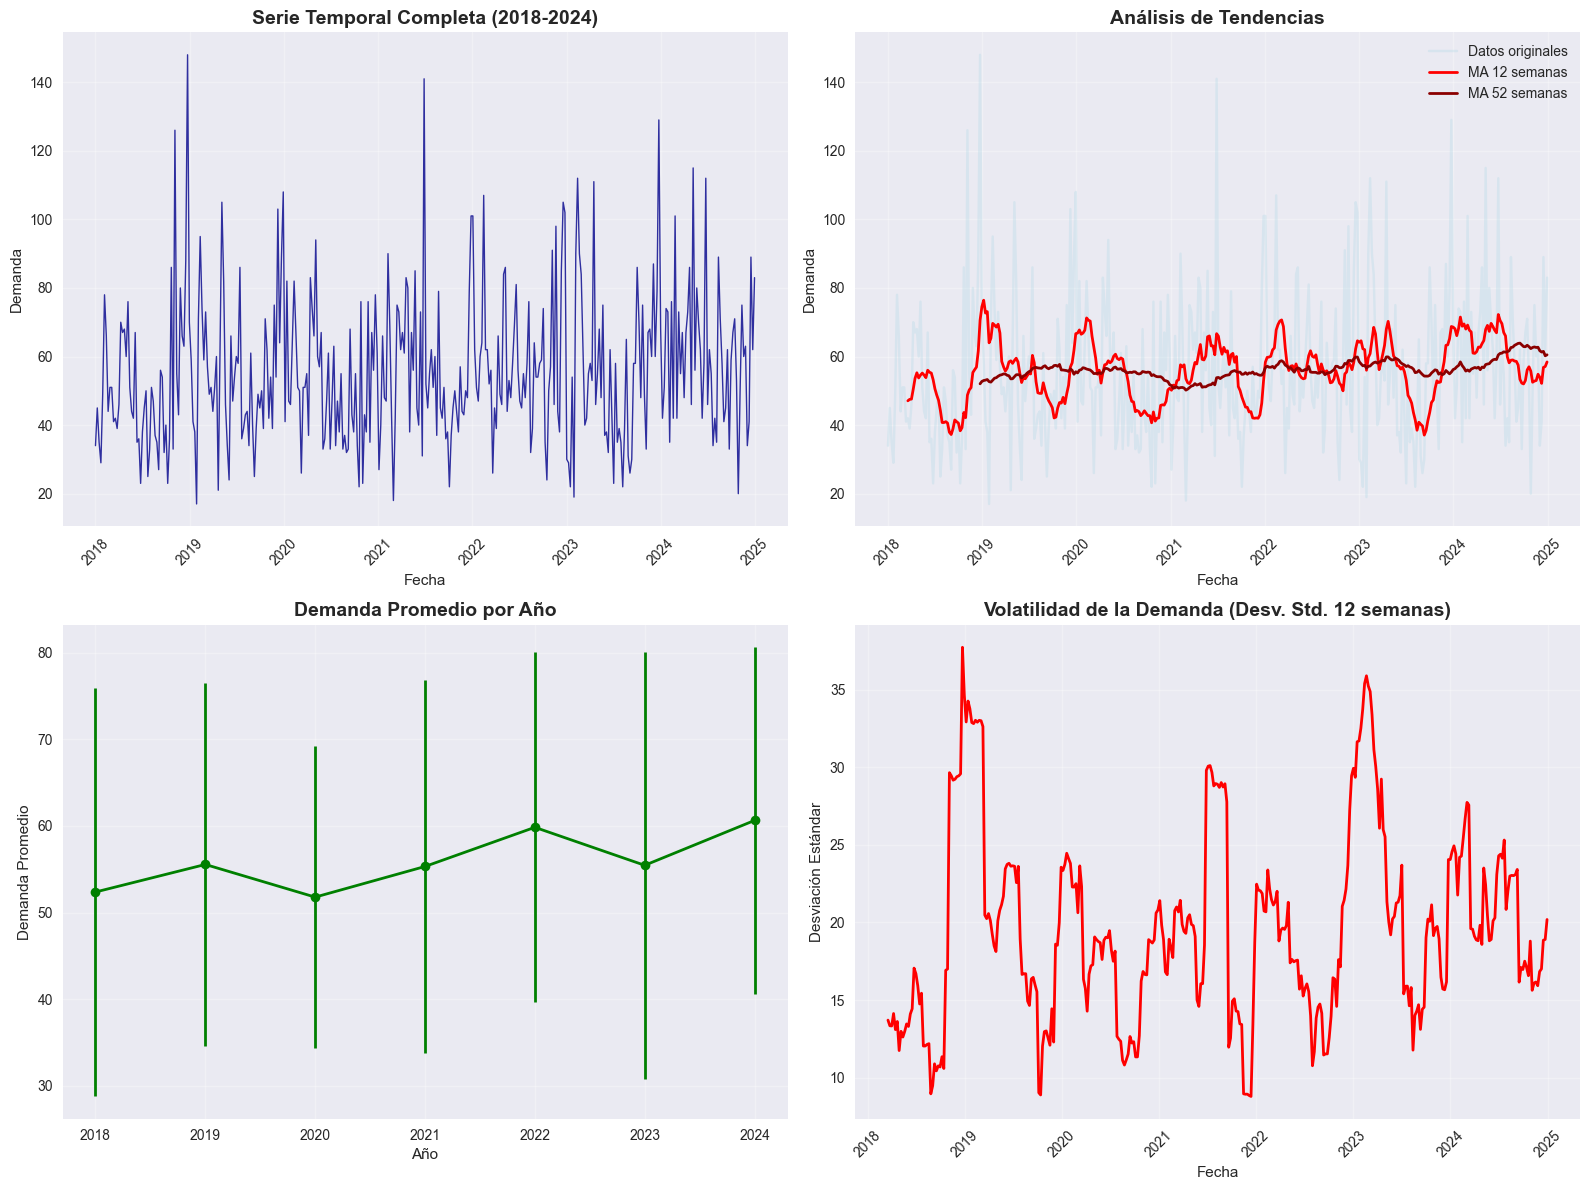

In [44]:
# 2. ANÁLISIS TEMPORAL COMPLETO
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Serie temporal completa
axes[0,0].plot(df['week_start'], df['demand'], linewidth=1, alpha=0.8, color='darkblue')
axes[0,0].set_title('Serie Temporal Completa (2018-2024)', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Fecha')
axes[0,0].set_ylabel('Demanda')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# Tendencia con medias móviles
df_sorted = df.sort_values('week_start')
ma_12 = df_sorted['demand'].rolling(window=12).mean()
ma_52 = df_sorted['demand'].rolling(window=52).mean()

axes[0,1].plot(df_sorted['week_start'], df_sorted['demand'], alpha=0.3, label='Datos originales', color='lightblue')
axes[0,1].plot(df_sorted['week_start'], ma_12, label='MA 12 semanas', linewidth=2, color='red')
axes[0,1].plot(df_sorted['week_start'], ma_52, label='MA 52 semanas', linewidth=2, color='darkred')
axes[0,1].set_title('Análisis de Tendencias', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Fecha')
axes[0,1].set_ylabel('Demanda')
axes[0,1].legend()
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

# Demanda por año
yearly_demand = df.groupby('year')['demand'].agg(['mean', 'std']).reset_index()
axes[1,0].errorbar(yearly_demand['year'], yearly_demand['mean'], 
                   yerr=yearly_demand['std'], marker='o', capsize=5, linewidth=2, color='green')
axes[1,0].set_title('Demanda Promedio por Año', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Año')
axes[1,0].set_ylabel('Demanda Promedio')
axes[1,0].grid(True, alpha=0.3)

# Volatilidad (desviación estándar móvil)
rolling_std = df_sorted['demand'].rolling(window=12).std()
axes[1,1].plot(df_sorted['week_start'], rolling_std, color='red', linewidth=2)
axes[1,1].set_title('Volatilidad de la Demanda (Desv. Std. 12 semanas)', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Fecha')
axes[1,1].set_ylabel('Desviación Estándar')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

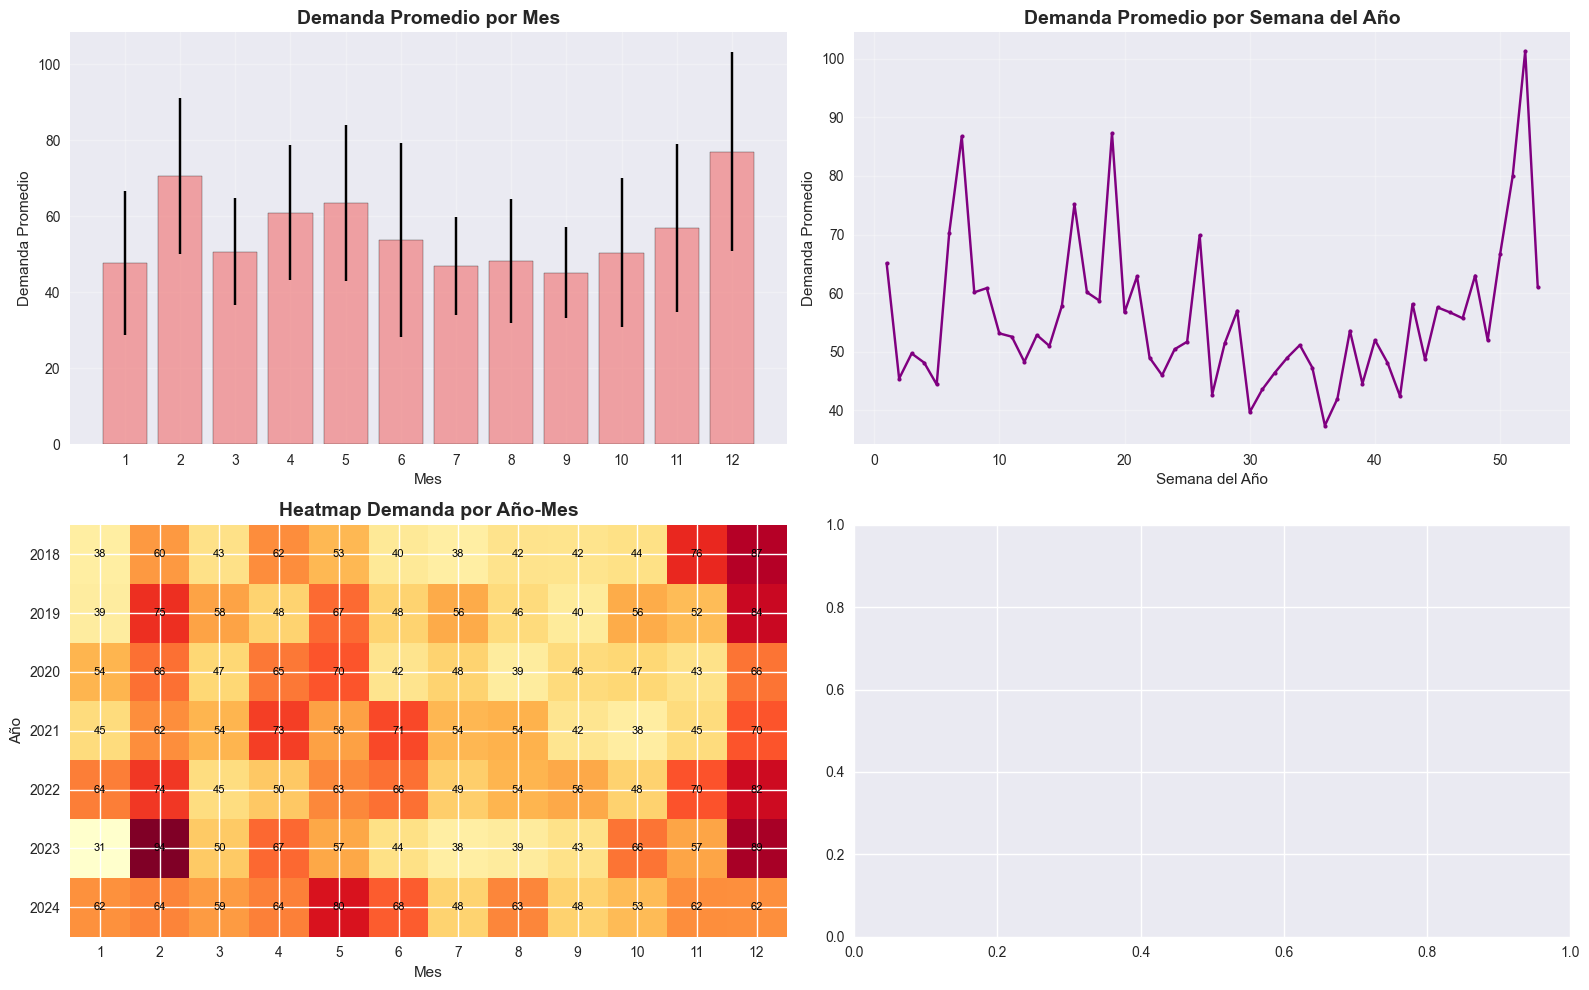

In [51]:
# 3. ANÁLISIS ESTACIONAL
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Demanda por mes
monthly_demand = df.groupby('month')['demand'].agg(['mean', 'std']).reset_index()
axes[0,0].bar(monthly_demand['month'], monthly_demand['mean'], 
              color='lightcoral', alpha=0.7, edgecolor='black')
axes[0,0].errorbar(monthly_demand['month'], monthly_demand['mean'], 
                   yerr=monthly_demand['std'], fmt='none', color='black', capsize=3)
axes[0,0].set_title('Demanda Promedio por Mes', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Mes')
axes[0,0].set_ylabel('Demanda Promedio')
axes[0,0].set_xticks(range(1, 13))
axes[0,0].grid(True, alpha=0.3)

# Demanda por semana del año
weekly_demand = df.groupby('week_of_year')['demand'].mean()
axes[0,1].plot(weekly_demand.index, weekly_demand.values, marker='o', markersize=3, color='purple')
axes[0,1].set_title('Demanda Promedio por Semana del Año', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Semana del Año')
axes[0,1].set_ylabel('Demanda Promedio')
axes[0,1].grid(True, alpha=0.3)

# Heatmap año-mes
pivot_table = df.pivot_table(values='demand', index='year', columns='month', aggfunc='mean')
im = axes[1,0].imshow(pivot_table.values, cmap='YlOrRd', aspect='auto')
axes[1,0].set_xticks(range(len(pivot_table.columns)))
axes[1,0].set_xticklabels(pivot_table.columns)
axes[1,0].set_yticks(range(len(pivot_table.index)))
axes[1,0].set_yticklabels(pivot_table.index)
axes[1,0].set_title('Heatmap Demanda por Año-Mes', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Mes')
axes[1,0].set_ylabel('Año')

# Agregar valores al heatmap
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        if not pd.isna(pivot_table.iloc[i, j]):
            axes[1,0].text(j, i, f'{pivot_table.iloc[i, j]:.0f}', 
                          ha='center', va='center', fontsize=8, color='black')


plt.tight_layout()
plt.show()

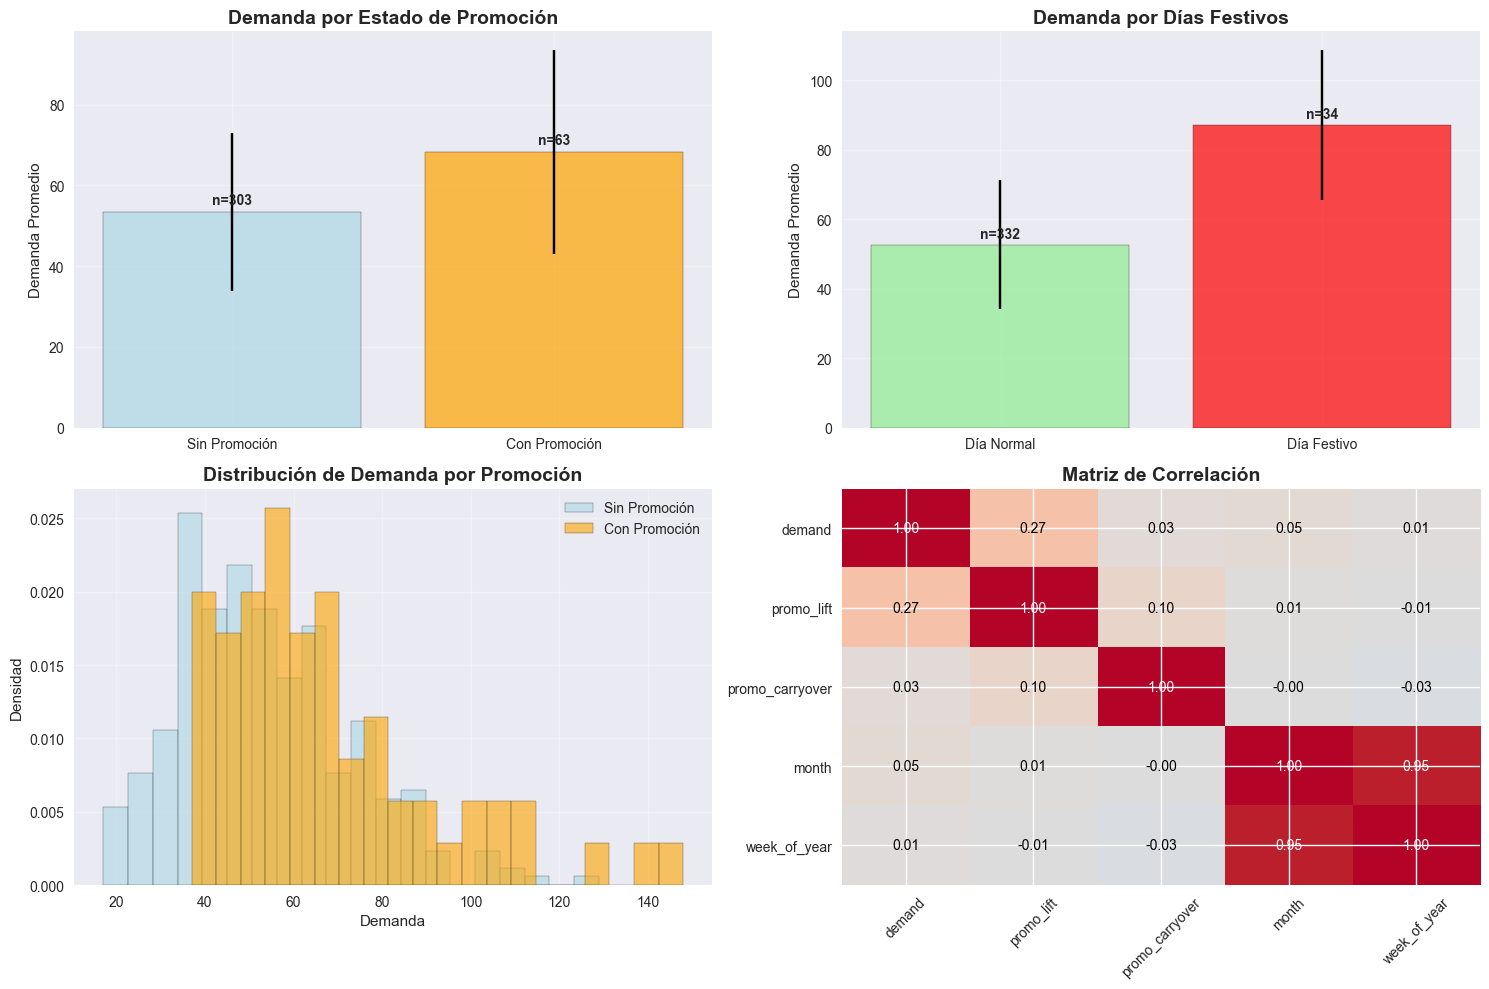

In [46]:
# 4. ANÁLISIS DE FACTORES EXTERNOS
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Efecto de promociones
promo_data = df.groupby('promo_flag')['demand'].agg(['mean', 'std', 'count']).reset_index()
promo_labels = ['Sin Promoción', 'Con Promoción']
axes[0,0].bar(range(len(promo_data)), promo_data['mean'], 
              yerr=promo_data['std'], capsize=5,
              color=['lightblue', 'orange'], alpha=0.7, edgecolor='black')
axes[0,0].set_title('Demanda por Estado de Promoción', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Demanda Promedio')
axes[0,0].set_xticks(range(len(promo_data)))
axes[0,0].set_xticklabels(promo_labels)
axes[0,0].grid(True, alpha=0.3)

# Agregar valores y conteos
for i, (mean_val, count) in enumerate(zip(promo_data['mean'], promo_data['count'])):
    axes[0,0].text(i, mean_val + 2, f'n={count}', ha='center', fontweight='bold')

# Efecto de días festivos
holiday_data = df.groupby('holiday_flag')['demand'].agg(['mean', 'std', 'count']).reset_index()
holiday_labels = ['Día Normal', 'Día Festivo']
axes[0,1].bar(range(len(holiday_data)), holiday_data['mean'], 
              yerr=holiday_data['std'], capsize=5,
              color=['lightgreen', 'red'], alpha=0.7, edgecolor='black')
axes[0,1].set_title('Demanda por Días Festivos', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Demanda Promedio')
axes[0,1].set_xticks(range(len(holiday_data)))
axes[0,1].set_xticklabels(holiday_labels)
axes[0,1].grid(True, alpha=0.3)

# Agregar valores y conteos
for i, (mean_val, count) in enumerate(zip(holiday_data['mean'], holiday_data['count'])):
    axes[0,1].text(i, mean_val + 2, f'n={count}', ha='center', fontweight='bold')

# Distribución de demanda por promoción (densidades)
for promo in df['promo_flag'].unique():
    subset = df[df['promo_flag'] == promo]['demand']
    label = 'Con Promoción' if promo == 1 else 'Sin Promoción'
    color = 'orange' if promo == 1 else 'lightblue'
    axes[1,0].hist(subset, alpha=0.6, label=label, bins=20, 
                   density=True, color=color, edgecolor='black')
axes[1,0].set_title('Distribución de Demanda por Promoción', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Demanda')
axes[1,0].set_ylabel('Densidad')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Matriz de correlación
numeric_cols = ['demand', 'promo_lift', 'promo_carryover', 'month', 'week_of_year']
correlation_matrix = df[numeric_cols].corr()
im = axes[1,1].imshow(correlation_matrix.values, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')
axes[1,1].set_xticks(range(len(numeric_cols)))
axes[1,1].set_xticklabels(numeric_cols, rotation=45)
axes[1,1].set_yticks(range(len(numeric_cols)))
axes[1,1].set_yticklabels(numeric_cols)
axes[1,1].set_title('Matriz de Correlación', fontsize=14, fontweight='bold')

# Agregar valores de correlación
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        axes[1,1].text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                      ha='center', va='center', fontsize=10, 
                      color='white' if abs(correlation_matrix.iloc[i, j]) > 0.5 else 'black')

plt.tight_layout()
plt.show()

C:\CUDA_TEMP\ipykernel_24424\4217577407.py:73: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\CUDA_TEMP\ipykernel_24424\4217577407.py:73: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\CUDA_TEMP\ipykernel_24424\4217577407.py:73: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\javil\OneDrive\Documentos\U\Deep Learning\DL-ProyectoFinal-PrediccionDemandaLSTM\proyectoDL\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\javil\OneDrive\Documentos\U\Deep Learning\DL-ProyectoFinal-PrediccionDemandaLSTM\proyectoDL\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127914 (\N{CIRCUS TENT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\javil\OneDrive\Docume

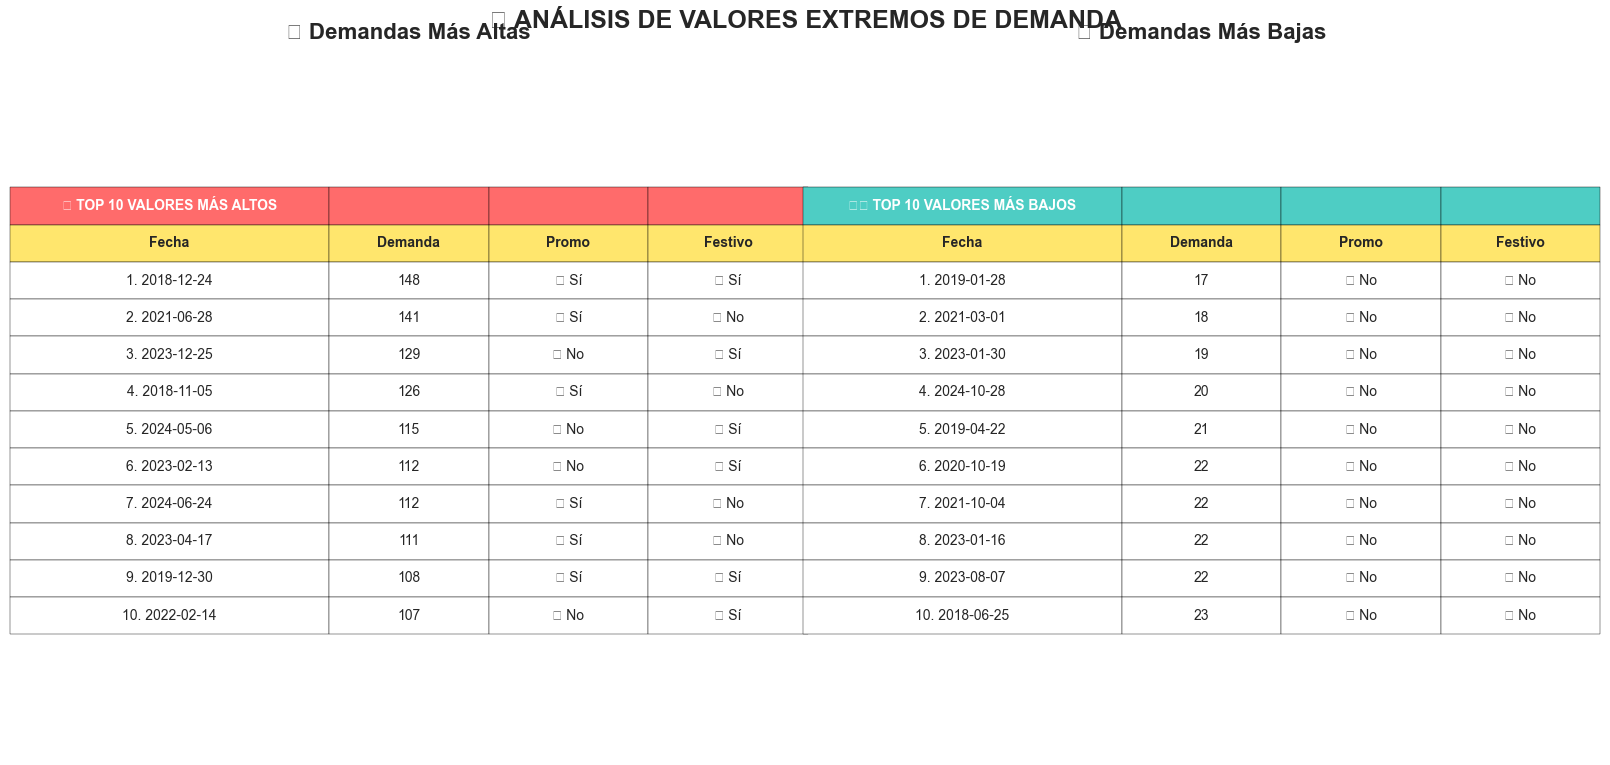

📊 RESUMEN DE VALORES EXTREMOS

🔥 VALORES MÁS ALTOS:
   • Demanda máxima: 148 (2018-12-24)
   • Promedio top 10: 120.90
   • Con promoción: 6/10
   • En días festivos: 6/10

❄️ VALORES MÁS BAJOS:
   • Demanda mínima: 17 (2019-01-28)
   • Promedio bottom 10: 20.60
   • Con promoción: 0/10
   • En días festivos: 0/10

📈 INSIGHTS CLAVE:
   • Diferencia máx-mín: 131 unidades
   • Factor de variación: 8.7x

🗓️ DISTRIBUCIÓN POR AÑOS:
   VALORES ALTOS:
   • 2018: 2 casos
   • 2019: 1 casos
   • 2021: 1 casos
   • 2022: 1 casos
   • 2023: 3 casos
   • 2024: 2 casos
   VALORES BAJOS:
   • 2018: 1 casos
   • 2019: 2 casos
   • 2020: 1 casos
   • 2021: 2 casos
   • 2023: 3 casos
   • 2024: 1 casos


In [57]:
# 5. ANÁLISIS DE OUTLIERS Y ANOMALÍAS - TOP 10 VALORES EXTREMOS

# Obtener top 10 valores más altos y más bajos
top_demands = df.nlargest(10, 'demand')[['week_start', 'demand', 'promo_flag', 'holiday_flag']]
bottom_demands = df.nsmallest(10, 'demand')[['week_start', 'demand', 'promo_flag', 'holiday_flag']]

# Crear figura con dos subplots para las tablas
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# TABLA 1: TOP 10 VALORES MÁS ALTOS
axes[0].axis('tight')
axes[0].axis('off')
table_data_high = []
table_data_high.append(['🔥 TOP 10 VALORES MÁS ALTOS', '', '', ''])
table_data_high.append(['Fecha', 'Demanda', 'Promo', 'Festivo'])
for i, (_, row) in enumerate(top_demands.iterrows(), 1):
    table_data_high.append([
        f"{i}. {row['week_start'].strftime('%Y-%m-%d')}", 
        f"{row['demand']:.0f}",
        '🎪 Sí' if row['promo_flag'] == 1 else '❌ No',
        '🎄 Sí' if row['holiday_flag'] == 1 else '❌ No'
    ])

table_high = axes[0].table(cellText=table_data_high, 
                          cellLoc='center',
                          loc='center',
                          colWidths=[0.4, 0.2, 0.2, 0.2])
table_high.auto_set_font_size(False)
table_high.set_fontsize(10)
table_high.scale(1.2, 2)

# Colorear encabezados
for i in range(4):
    table_high[(0, i)].set_facecolor('#ff6b6b')
    table_high[(0, i)].set_text_props(weight='bold', color='white')
    table_high[(1, i)].set_facecolor('#ffe66d')
    table_high[(1, i)].set_text_props(weight='bold')

axes[0].set_title('📈 Demandas Más Altas', fontsize=16, fontweight='bold', pad=20)

# TABLA 2: TOP 10 VALORES MÁS BAJOS
axes[1].axis('tight')
axes[1].axis('off')
table_data_low = []
table_data_low.append(['❄️ TOP 10 VALORES MÁS BAJOS', '', '', ''])
table_data_low.append(['Fecha', 'Demanda', 'Promo', 'Festivo'])
for i, (_, row) in enumerate(bottom_demands.iterrows(), 1):
    table_data_low.append([
        f"{i}. {row['week_start'].strftime('%Y-%m-%d')}", 
        f"{row['demand']:.0f}",
        '🎪 Sí' if row['promo_flag'] == 1 else '❌ No',
        '🎄 Sí' if row['holiday_flag'] == 1 else '❌ No'
    ])

table_low = axes[1].table(cellText=table_data_low, 
                         cellLoc='center',
                         loc='center',
                         colWidths=[0.4, 0.2, 0.2, 0.2])
table_low.auto_set_font_size(False)
table_low.set_fontsize(10)
table_low.scale(1.2, 2)

# Colorear encabezados
for i in range(4):
    table_low[(0, i)].set_facecolor('#4ecdc4')
    table_low[(0, i)].set_text_props(weight='bold', color='white')
    table_low[(1, i)].set_facecolor('#ffe66d')
    table_low[(1, i)].set_text_props(weight='bold')

axes[1].set_title('📉 Demandas Más Bajas', fontsize=16, fontweight='bold', pad=20)

plt.suptitle('🎯 ANÁLISIS DE VALORES EXTREMOS DE DEMANDA', fontsize=18, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()

# Resumen estadístico de los valores extremos
print("="*80)
print("📊 RESUMEN DE VALORES EXTREMOS")
print("="*80)

print(f"\n🔥 VALORES MÁS ALTOS:")
print(f"   • Demanda máxima: {top_demands.iloc[0]['demand']:.0f} ({top_demands.iloc[0]['week_start'].strftime('%Y-%m-%d')})")
print(f"   • Promedio top 10: {top_demands['demand'].mean():.2f}")
print(f"   • Con promoción: {(top_demands['promo_flag'] == 1).sum()}/10")
print(f"   • En días festivos: {(top_demands['holiday_flag'] == 1).sum()}/10")

print(f"\n❄️ VALORES MÁS BAJOS:")
print(f"   • Demanda mínima: {bottom_demands.iloc[0]['demand']:.0f} ({bottom_demands.iloc[0]['week_start'].strftime('%Y-%m-%d')})")
print(f"   • Promedio bottom 10: {bottom_demands['demand'].mean():.2f}")
print(f"   • Con promoción: {(bottom_demands['promo_flag'] == 1).sum()}/10")
print(f"   • En días festivos: {(bottom_demands['holiday_flag'] == 1).sum()}/10")

print(f"\n📈 INSIGHTS CLAVE:")
print(f"   • Diferencia máx-mín: {df['demand'].max() - df['demand'].min():.0f} unidades")
print(f"   • Factor de variación: {df['demand'].max() / df['demand'].min():.1f}x")

# Análisis por años de los valores extremos
print(f"\n🗓️ DISTRIBUCIÓN POR AÑOS:")
print("   VALORES ALTOS:")
for year in sorted(top_demands['week_start'].dt.year.unique()):
    count = (top_demands['week_start'].dt.year == year).sum()
    print(f"   • {year}: {count} casos")

print("   VALORES BAJOS:")
for year in sorted(bottom_demands['week_start'].dt.year.unique()):
    count = (bottom_demands['week_start'].dt.year == year).sum()
    print(f"   • {year}: {count} casos")

print("="*80)

In [48]:
# 6. RESUMEN ESTADÍSTICO FINAL
print("="*80)
print("RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO DE DATOS")
print("="*80)

# Estadísticas básicas
print(f"\n📊 ESTADÍSTICAS CLAVE:")
print(f"   • Total de observaciones: {len(df):,}")
print(f"   • Período analizado: {df['week_start'].min().strftime('%Y-%m-%d')} a {df['week_start'].max().strftime('%Y-%m-%d')}")
print(f"   • Demanda promedio: {df['demand'].mean():.2f} ± {df['demand'].std():.2f}")
print(f"   • Rango de demanda: {df['demand'].min()} - {df['demand'].max()} unidades")
print(f"   • Coeficiente de variación: {(df['demand'].std()/df['demand'].mean())*100:.1f}%")

# Análisis de tendencia
df_sorted = df.sort_values('week_start').reset_index(drop=True)
# Crear una serie temporal numérica para calcular la correlación
time_index = pd.Series(range(len(df_sorted)))
trend_correlation = time_index.corr(df_sorted['demand'])
print(f"\n📈 TENDENCIA:")
if trend_correlation > 0.1:
    print(f"   • Tendencia creciente detectada (correlación: {trend_correlation:.3f})")
elif trend_correlation < -0.1:
    print(f"   • Tendencia decreciente detectada (correlación: {trend_correlation:.3f})")
else:
    print(f"   • Sin tendencia clara (correlación: {trend_correlation:.3f})")

# Estacionalidad
monthly_cv = df.groupby('month')['demand'].std() / df.groupby('month')['demand'].mean()
max_seasonal_month = monthly_cv.idxmax()
min_seasonal_month = monthly_cv.idxmin()
print(f"\n🗓️ ESTACIONALIDAD:")
print(f"   • Mes con mayor variabilidad: {max_seasonal_month} (CV: {monthly_cv[max_seasonal_month]:.3f})")
print(f"   • Mes con menor variabilidad: {min_seasonal_month} (CV: {monthly_cv[min_seasonal_month]:.3f})")

# Impacto de promociones
if df['promo_flag'].sum() > 0:
    promo_impact = df[df['promo_flag']==1]['demand'].mean() / df[df['promo_flag']==0]['demand'].mean() - 1
    print(f"\n🎪 IMPACTO PROMOCIONAL:")
    print(f"   • Incremento promedio por promoción: {promo_impact*100:+.1f}%")
    print(f"   • Semanas con promoción: {df['promo_flag'].sum()} de {len(df)} ({df['promo_flag'].mean()*100:.1f}%)")

# Impacto de festividades
if df['holiday_flag'].sum() > 0:
    holiday_impact = df[df['holiday_flag']==1]['demand'].mean() / df[df['holiday_flag']==0]['demand'].mean() - 1
    print(f"\n🎉 IMPACTO DE FESTIVIDADES:")
    print(f"   • Incremento promedio en días festivos: {holiday_impact*100:+.1f}%")
    print(f"   • Semanas festivas: {df['holiday_flag'].sum()} de {len(df)} ({df['holiday_flag'].mean()*100:.1f}%)")

# Outliers
Q1, Q3 = df['demand'].quantile([0.25, 0.75])
IQR = Q3 - Q1
outliers = df[(df['demand'] < Q1 - 1.5*IQR) | (df['demand'] > Q3 + 1.5*IQR)]
print(f"\n🔍 VALORES ATÍPICOS:")
print(f"   • Outliers detectados: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
if len(outliers) > 0:
    print(f"   • Valor máximo atípico: {outliers['demand'].max()}")
    print(f"   • Valor mínimo atípico: {outliers['demand'].min()}")

print(f"\n🎯 RECOMENDACIONES PARA MODELADO:")
print("   • Considerar transformación log si la distribución está sesgada")
print("   • Incluir variables estacionales (mes, semana del año)")
print("   • Incorporar efectos de promociones y festividades")
print("   • Evaluar tratamiento de outliers según contexto de negocio")
if abs(trend_correlation) > 0.1:
    trend_direction = "creciente" if trend_correlation > 0 else "decreciente"
    print(f"   • Incluir componente de tendencia {trend_direction} en el modelo")
print("="*80)

RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO DE DATOS

📊 ESTADÍSTICAS CLAVE:
   • Total de observaciones: 366
   • Período analizado: 2018-01-01 a 2024-12-30
   • Demanda promedio: 55.86 ± 21.37
   • Rango de demanda: 17 - 148 unidades
   • Coeficiente de variación: 38.3%

📈 TENDENCIA:
   • Tendencia creciente detectada (correlación: 0.116)

🗓️ ESTACIONALIDAD:
   • Mes con mayor variabilidad: 6 (CV: 0.477)
   • Mes con menor variabilidad: 9 (CV: 0.266)

🎪 IMPACTO PROMOCIONAL:
   • Incremento promedio por promoción: +27.9%
   • Semanas con promoción: 63 de 366 (17.2%)

🎉 IMPACTO DE FESTIVIDADES:
   • Incremento promedio en días festivos: +65.2%
   • Semanas festivas: 34 de 366 (9.3%)

🔍 VALORES ATÍPICOS:
   • Outliers detectados: 10 (2.7%)
   • Valor máximo atípico: 148
   • Valor mínimo atípico: 107

🎯 RECOMENDACIONES PARA MODELADO:
   • Considerar transformación log si la distribución está sesgada
   • Incluir variables estacionales (mes, semana del año)
   • Incorporar efectos de prom